Installing required dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.cluster import KMeans

Reading in the data

In [2]:
df = pd.read_csv('D:\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Looking at some statistical metrics of the data

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Looking at the data types of columns

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Checking for missing value in the dataset

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Plotting a histogram for distribution of ages of customers in the set

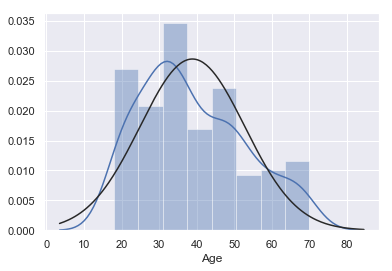

In [7]:
from scipy.stats import norm
sns.distplot(df['Age'], fit = norm)

Plotting a histogram for distribution of annual income of customers in the set

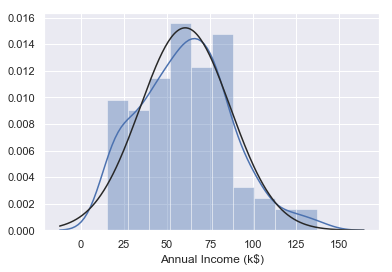

In [8]:
sns.distplot(df['Annual Income (k$)'], fit = norm)

Plotting a histogram for distribution of Spending score(out of 100) of customers in the set

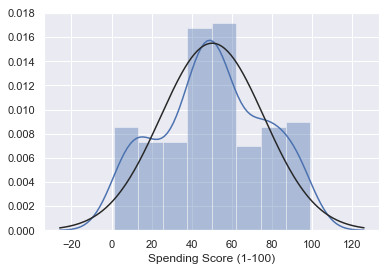

In [9]:
sns.distplot(df['Spending Score (1-100)'], fit = norm)

Value counts with respect to gender of the customer

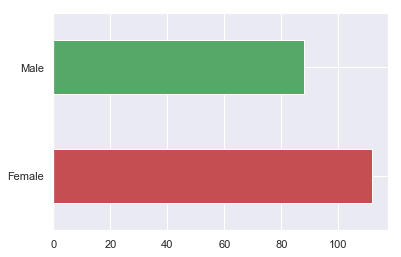

In [10]:
A = df['Gender'].value_counts()
A.plot(kind = 'barh', color = ['r', 'g'])

Correlation between Age and Annual Income of the customer

In [11]:
df.loc[:,['Age','Annual Income (k$)']].corr()

,Age,Annual Income (k$)
Age,1.000000,-0.012398
Annual Income (k$),-0.012398,1.000000


Plotting the regression plot for the above correlation

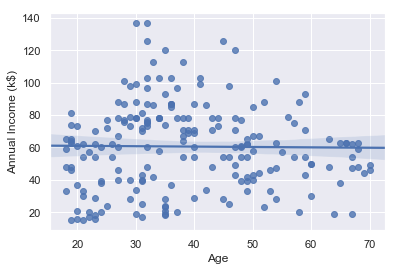

In [12]:
sns.regplot(x = 'Age', y = 'Annual Income (k$)', data = df)

Correlation between Age and Spending Score (1-100) of the customer

In [13]:
df.loc[:,['Age','Spending Score (1-100)']].corr()

,Age,Spending Score (1-100)
Age,1.000000,-0.327227
Spending Score (1-100),-0.327227,1.000000


Plotting the regression plot for the above correlation

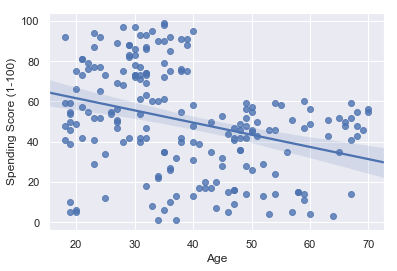

In [14]:
sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = df)

Correlation between Annual Income and Spending Score (1-100) of the customer

In [15]:
df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].corr()

,Annual Income (k$),Spending Score (1-100)
Annual Income (k$),1.000000,0.009903
Spending Score (1-100),0.009903,1.000000


Plotting the regression plot for the above correlation

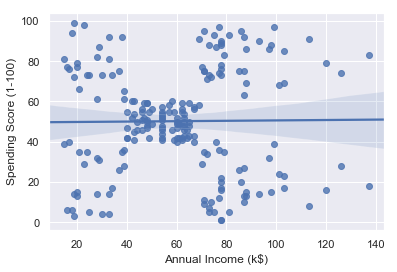

In [16]:
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

Heatmap showing correlation among all features of the dataset

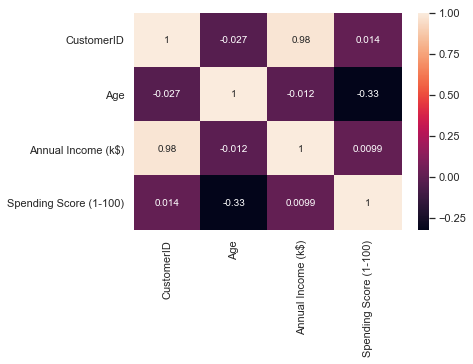

In [17]:
sns.heatmap(df.corr(), annot = True)
sns.set(rc = {'figure.figsize':(12,6)})

Spending score (max, min, mean, median) with respect to gender of the customer

In [18]:
df.groupby(['Gender'])['Spending Score (1-100)'].agg(['max','min','mean','median'])

,max,min,mean,median
Gender,,,,
Female,99,5,51.526786,50
Male,97,1,48.511364,50


Plotting the mean and median spending score (out of 100) with respect to the gender of the customer

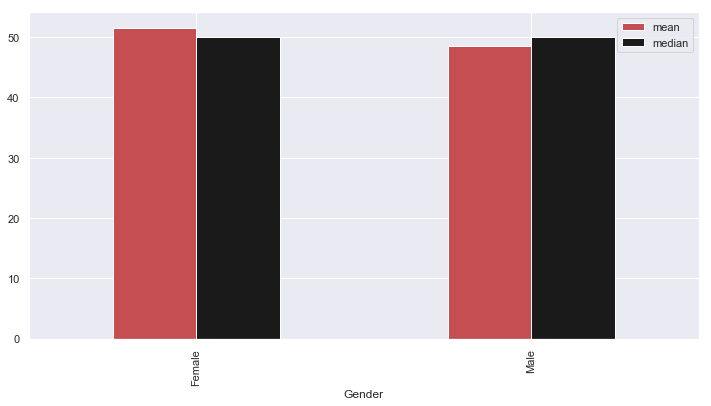

In [19]:
df.groupby(['Gender'])['Spending Score (1-100)'].agg(['mean','median']).plot(kind = 'bar', color = ['r','k'])

Scatter plot for variation of Annual Income with Age of the customer with respect to the gender of the customer

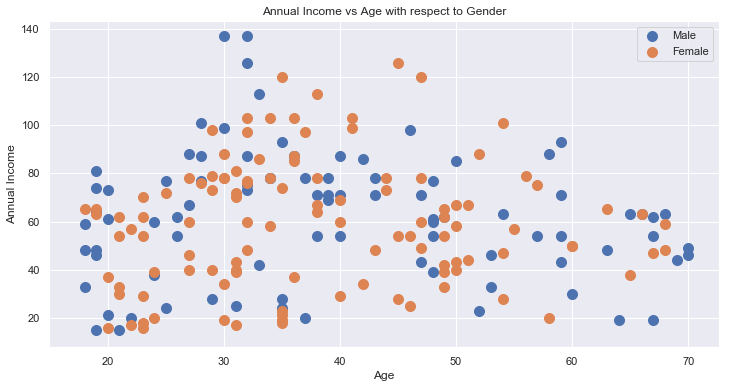

In [20]:
plt.figure(1, figsize = (12,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' ,
                data = df[df['Gender'] == gender],
                s = 100,alpha = 1,label = gender)
    plt.title('Annual Income vs Age with respect to Gender')
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.legend()

Scatter plot for variation of Spending score(out of 100) with Annual Income  of the customer with respect to the gender of the customer

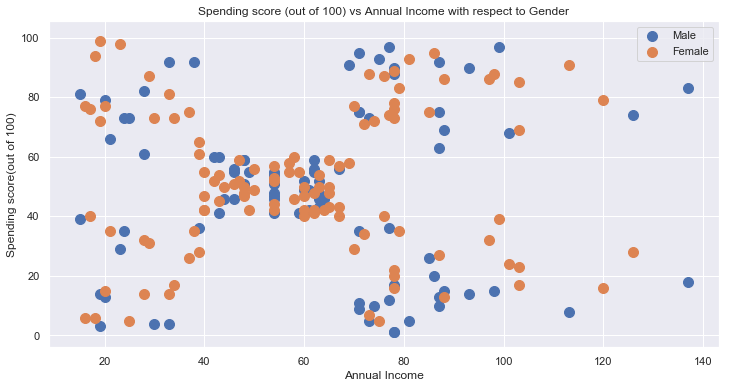

In [21]:
plt.figure(2, figsize = (12,6))
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender],
                s = 100,alpha = 1,label = gender)
    plt.title('Spending score (out of 100) vs Annual Income with respect to Gender')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending score(out of 100)')
    plt.legend()

# K- Means Clustering

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We will be building two clustering models 
1. Clusters of customers on spending scores with respect to the age
2. Clusters of customers on Annual Income with respect to Spending scores

Moreover we will be using two Clustering algorithms 
1. The conventional KMeans Clustering algorithm
2. Agglomerative Clustring Algorithm

Slicing out the dataframe from the dataset for our first cluster

In [23]:
X1 = df.iloc[:,[2,4]]

Using kmeans++ for to find optimum number of clusters for our clustering algorithm

In [24]:
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)    

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

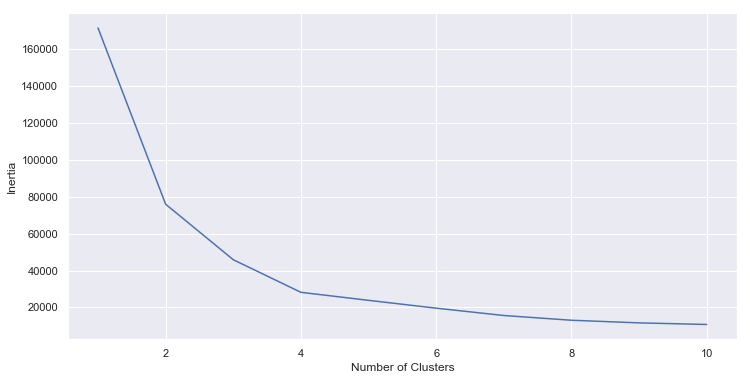

In [25]:
plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

Building the clustering model using the KMeans algorithm and plotting the results by means of a scatter plot

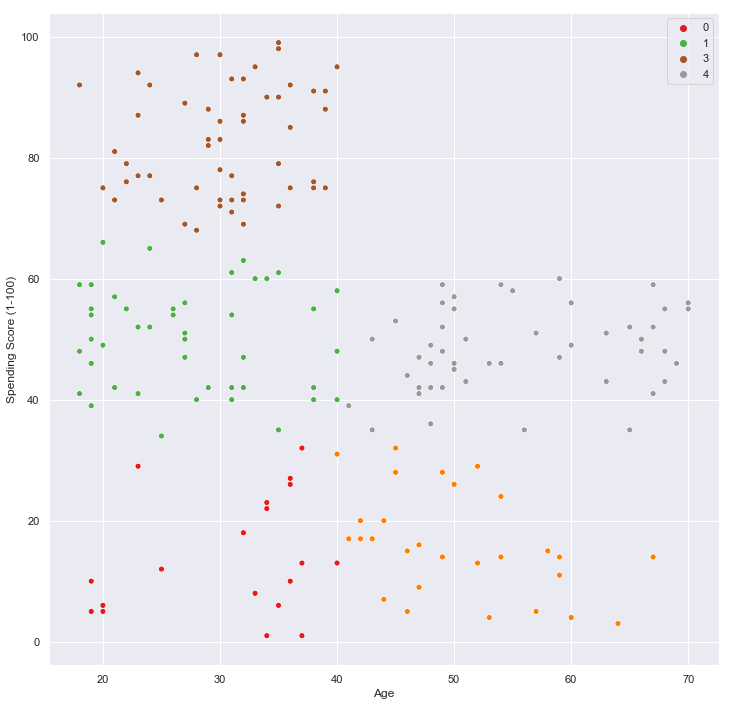

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 100)
y1 = kmeans.fit_predict(X1)
plt.figure(figsize = (12,12))
sns.set(palette = 'muted')
cmap = sns.cubehelix_palette(dark = 0.3, light = 0.8, as_cmap = True)
sns.scatterplot(x = df.iloc[:,2], y = df.iloc[:,4], hue = y1, palette = 'Set1')

Building the clustering model using the Agglomerative Clustering algorithm and plotting the results by means of a scatter plot

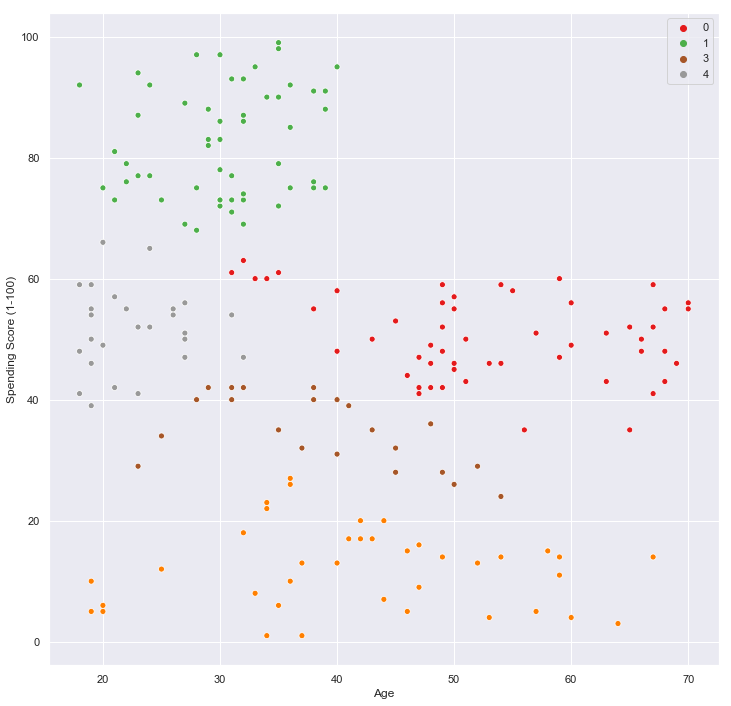

In [27]:
from sklearn.cluster import AgglomerativeClustering as AggClus
aggclus = AggClus(n_clusters = 5)
y1_agg = aggclus.fit_predict(X1)
plt.figure(figsize = (12,12))
sns.set(palette = 'muted')
cmap = sns.cubehelix_palette(dark = 0.3, light = 0.8, as_cmap = True)
sns.scatterplot(x = df.iloc[:,2], y = df.iloc[:,4], hue = y1_agg, palette = 'Set1')

Slicing the dataframe for our second clustering algorithm implementation

In [28]:
X2 = df.iloc[:,[3,4]]

Using kmeans++ for to find optimum number of clusters for our clustering algorithm

In [29]:
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)    

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

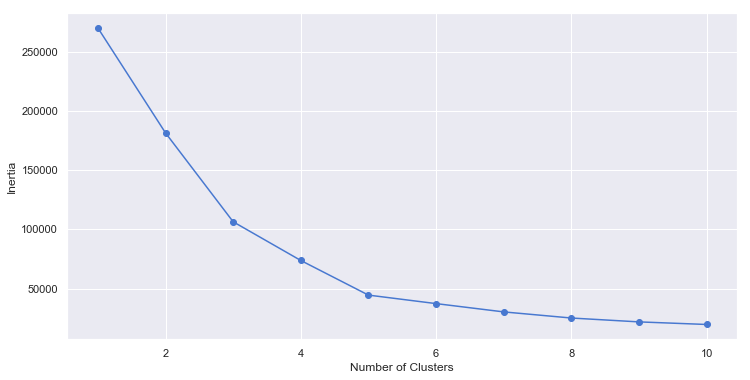

In [30]:
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

Building the clustering model using the KMeans Clustering algorithm and plotting the results by means of a scatter plot

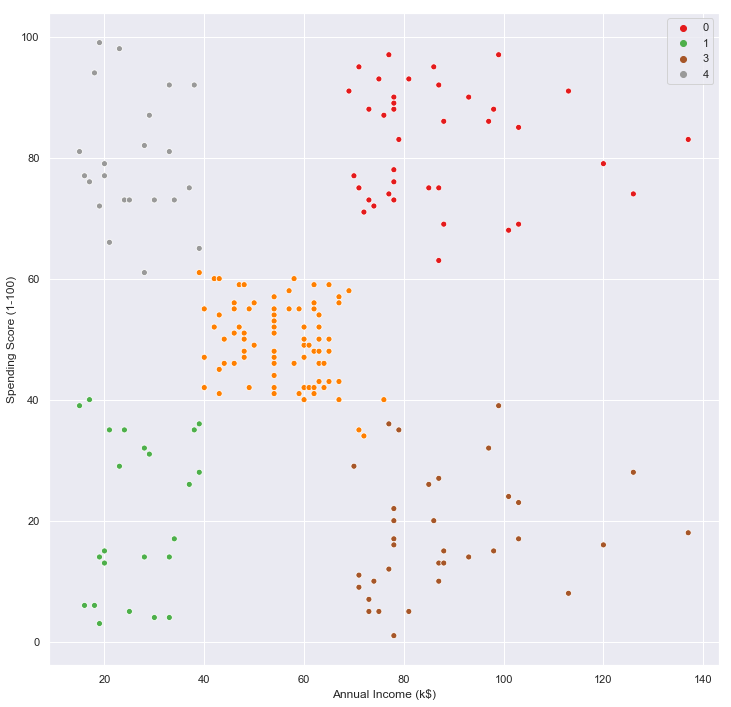

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 100)
y2 = kmeans.fit_predict(X2)
plt.figure(figsize = (12,12))
sns.set(palette = 'muted')
cmap = sns.cubehelix_palette(dark = 0.3, light = 0.8, as_cmap = True)
sns.scatterplot(x = df.iloc[:,3], y = df.iloc[:,4], hue = y2, palette = 'Set1')

Building the clustering model using the Agglomerative Clustering algorithm and plotting the results by means of a scatter plot

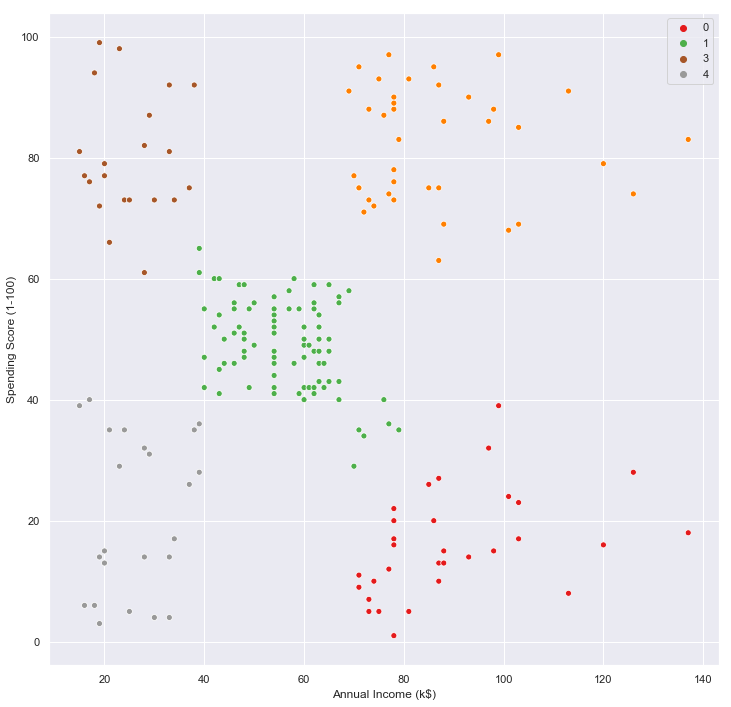

In [32]:
from sklearn.cluster import AgglomerativeClustering as AggClus
aggclus = AggClus(n_clusters = 5)
y2_agg = aggclus.fit_predict(X2)
plt.figure(figsize = (12,12))
sns.set(palette = 'muted')
cmap = sns.cubehelix_palette(dark = 0.3, light = 0.8, as_cmap = True)
sns.scatterplot(x = df.iloc[:,3], y = df.iloc[:,4], hue = y2_agg, palette = 'Set1')